In [3]:
import os
os.chdir('/Users/apple/Downloads')

In [4]:
import pandas as pd
data=pd.read_csv('exchange30032024.csv')

In [5]:
data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
3/27/2024,US DOLLAR,2024,March,1303.3420,1303.8420,1304.3420,NaN
3/27/2024,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231,NaN
3/27/2024,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231,NaN
3/27/2024,EURO,2024,March,1410.3464,1410.8874,1411.4285,NaN
3/27/2024,SWISS FRANC,2024,March,1438.8850,1439.4370,1439.9890,NaN


In [6]:
#reset the columns, name mismatch
data.reset_index(inplace=True)
data.rename(columns={'index': 'Rate Date'}, inplace=True)

In [7]:
data.head()

,Rate Date,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,3/27/2024,US DOLLAR,2024,March,1303.3420,1303.8420,1304.3420,NaN
1,3/27/2024,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231,NaN
2,3/27/2024,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231,NaN
3,3/27/2024,EURO,2024,March,1410.3464,1410.8874,1411.4285,NaN
4,3/27/2024,SWISS FRANC,2024,March,1438.8850,1439.4370,1439.9890,NaN


In [8]:
#rearrange the columns
new_columns = ['Rate Date', 'Currency', 'Rate Year', 'Rate Month', 'Buying Rate', 'Central Rate', 'Selling Rate', 'r']

data.columns = new_columns

In [9]:
data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,r
0,3/27/2024,US DOLLAR,2024,March,1303.3420,1303.8420,1304.3420,NaN
1,3/27/2024,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231,NaN
2,3/27/2024,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231,NaN
3,3/27/2024,EURO,2024,March,1410.3464,1410.8874,1411.4285,NaN
4,3/27/2024,SWISS FRANC,2024,March,1438.8850,1439.4370,1439.9890,NaN


In [10]:
data.drop(columns=['r'], inplace=True)

In [11]:
data['Rate Date'] = pd.to_datetime(data['Rate Date'])

In [12]:
data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2024-03-27,US DOLLAR,2024,March,1303.3420,1303.8420,1304.3420
1,2024-03-27,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231
2,2024-03-27,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231
3,2024-03-27,EURO,2024,March,1410.3464,1410.8874,1411.4285
4,2024-03-27,SWISS FRANC,2024,March,1438.8850,1439.4370,1439.9890


In [13]:
usd_data=data[data['Currency']=='US DOLLAR']

In [14]:
usd_data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2024-03-27,US DOLLAR,2024,March,1303.342,1303.842,1304.342
13,2024-03-26,US DOLLAR,2024,March,1364.379,1364.879,1365.379
25,2024-03-25,US DOLLAR,2024,March,1415.134,1415.634,1416.134
37,2024-03-22,US DOLLAR,2024,March,1404.966,1405.466,1405.966
49,2024-03-21,US DOLLAR,2024,March,1447.886,1448.386,1448.886


In [15]:
usd_data.isnull().sum()

Rate Date       0
Currency        0
Rate Year       0
Rate Month      0
Buying Rate     0
Central Rate    0
Selling Rate    0
dtype: int64

In [17]:
usd_data['Rate Month']=usd_data['Rate Month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,
                                      'June':6,'July':7, 'August':8,'September':9,'October':10,
                                      'November':11,'December':12})

/var/folders/pb/q49x3lbx6313whr2jx93rk180000gn/T/ipykernel_70322/2489703059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_data['Rate Month']=usd_data['Rate Month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,


In [18]:
usd_data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2024-03-27,US DOLLAR,2024,3.0,1303.342,1303.842,1304.342
13,2024-03-26,US DOLLAR,2024,3.0,1364.379,1364.879,1365.379
25,2024-03-25,US DOLLAR,2024,3.0,1415.134,1415.634,1416.134
37,2024-03-22,US DOLLAR,2024,3.0,1404.966,1405.466,1405.966
49,2024-03-21,US DOLLAR,2024,3.0,1447.886,1448.386,1448.886


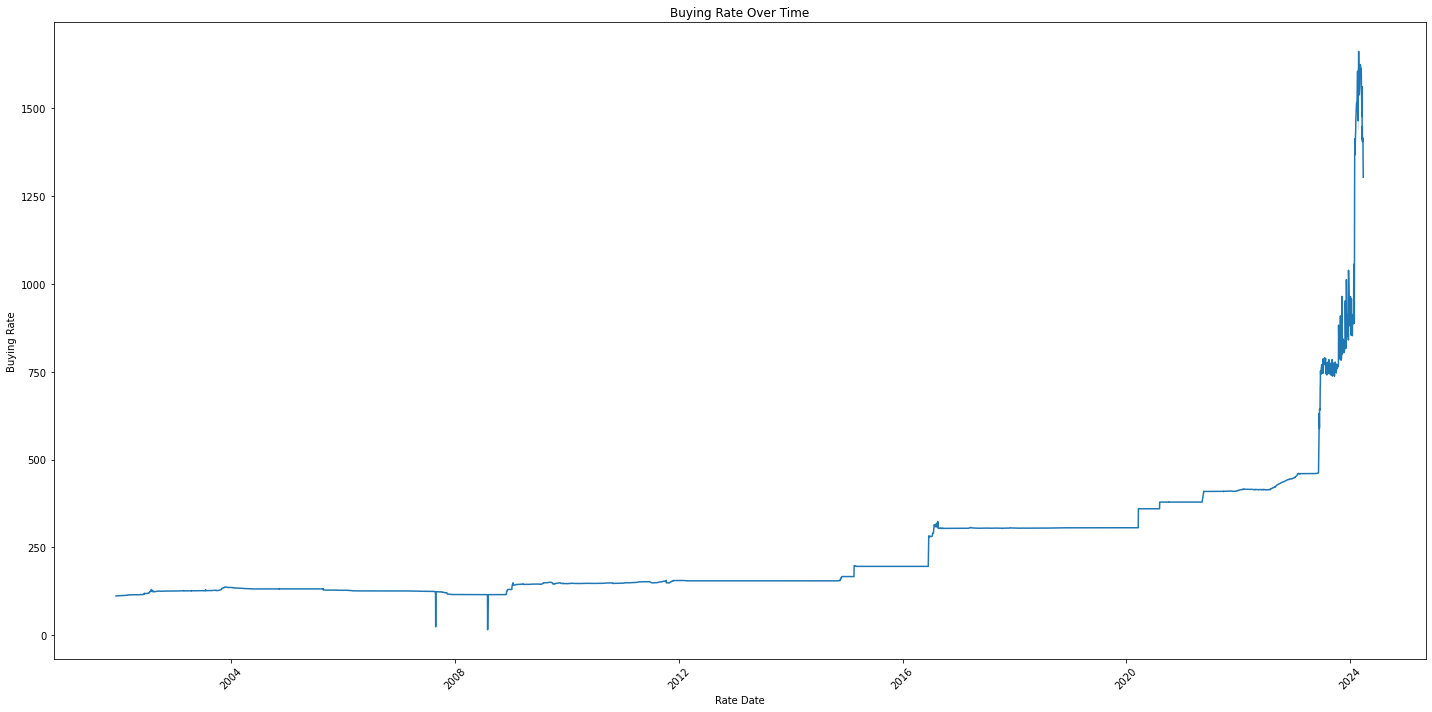

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.lineplot(x='Rate Date', y='Buying Rate', data=usd_data)
plt.title('Buying Rate Over Time')
plt.xlabel('Rate Date')
plt.ylabel('Buying Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

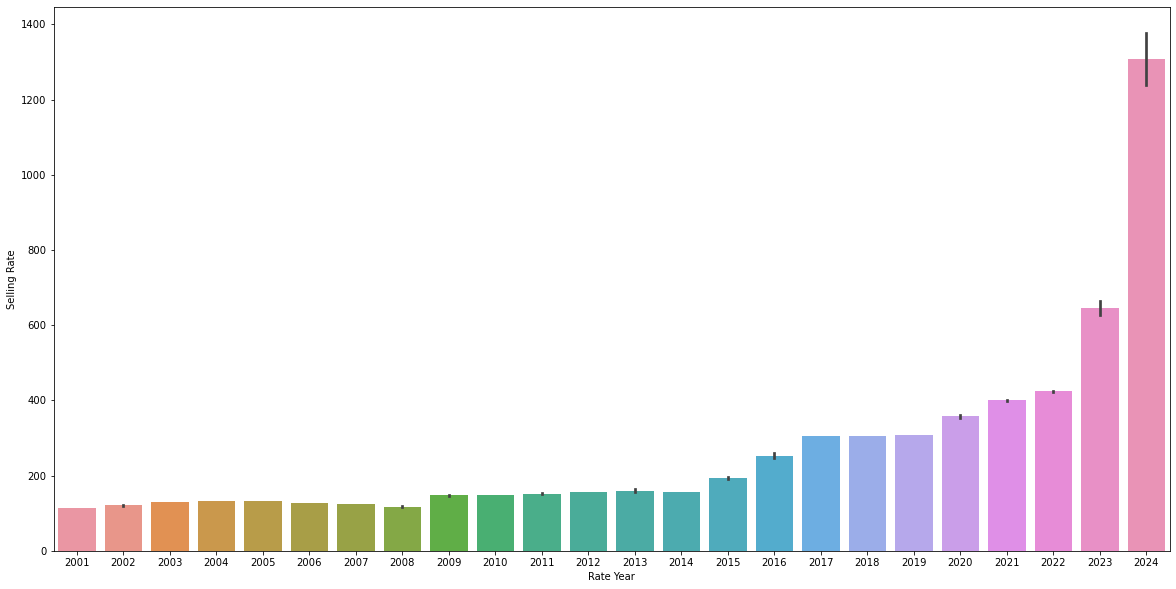

In [22]:
plt.figure(figsize=(20,10))
a=sns.barplot(x='Rate Year',y='Selling Rate', data=usd_data)

In [23]:
avg_buy_rate=usd_data.groupby('Rate Year')['Buying Rate'].mean().sort_values()

In [24]:
avg_buy_rate

Rate Year
2001     112.115385
2008     116.204297
2002     120.004919
2007     123.183000
2006     126.373580
2003     128.410612
2005     130.648724
2004     132.501800
2009     146.314878
2010     147.809593
2011     151.322675
2012     154.942418
2014     155.952358
2013     157.440671
2015     192.611935
2016     252.234073
2017     304.789139
2018     305.080600
2019     306.142975
2020     356.431184
2021     398.811792
2022     422.841890
2023     644.674062
2024    1306.429697
Name: Buying Rate, dtype: float64

<AxesSubplot:xlabel='Rate Year'>

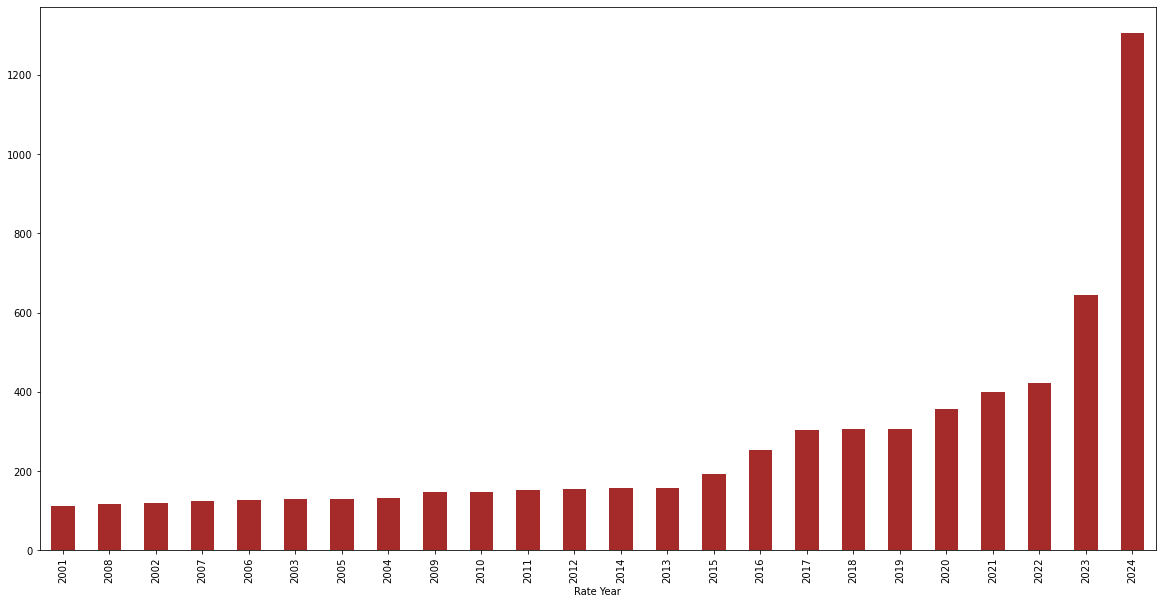

In [25]:
plt.figure(figsize=(20,10))
avg_buy_rate.plot(kind='bar', color='brown')

/var/folders/pb/q49x3lbx6313whr2jx93rk180000gn/T/ipykernel_70322/3406953767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_data['Normalized Buying Rate'] = usd_data['Buying Rate'] / usd_data[usd_data['Currency'] == reference_currency]['Buying Rate'].iloc[0]
/var/folders/pb/q49x3lbx6313whr2jx93rk180000gn/T/ipykernel_70322/3406953767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_data['Normalized Selling Rate'] = usd_data['Selling Rate'] / usd_data[usd_data['Currency'] == reference_currency]

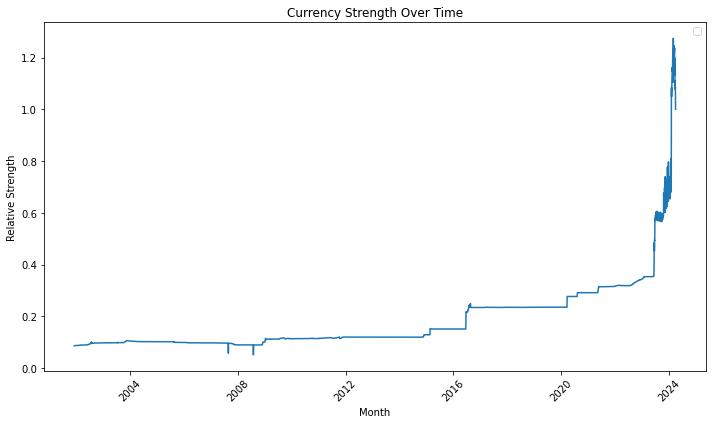

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


reference_currency = 'US DOLLAR'

# Normalize rates against the reference currency
usd_data['Normalized Buying Rate'] = usd_data['Buying Rate'] / usd_data[usd_data['Currency'] == reference_currency]['Buying Rate'].iloc[0]
usd_data['Normalized Selling Rate'] = usd_data['Selling Rate'] / usd_data[usd_data['Currency'] == reference_currency]['Selling Rate'].iloc[0]

# Calculate relative strength (average of normalized rates)
usd_data['Relative Strength'] = (usd_data['Normalized Buying Rate'] + usd_data['Normalized Selling Rate']) / 2

# Visualize currency strength over time using line plots
plt.figure(figsize=(10, 6))
for currency in usd_data['Currency'].unique():
    currency_data = usd_data[usd_data['Currency'] == currency]
    plt.plot(currency_data['Rate Date'], currency_data['Relative Strength'])

plt.xlabel('Month')
plt.ylabel('Relative Strength')
plt.title('Currency Strength Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
usd_data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Normalized Buying Rate,Normalized Selling Rate,Relative Strength,Volatility
0,2024-03-27,US DOLLAR,2024,3.0,1303.342,1303.842,1304.342,1.000000,1.000000,1.000000,0.707107
13,2024-03-26,US DOLLAR,2024,3.0,1364.379,1364.879,1365.379,1.046831,1.046795,1.046813,0.707107
25,2024-03-25,US DOLLAR,2024,3.0,1415.134,1415.634,1416.134,1.085773,1.085708,1.085740,0.707107
37,2024-03-22,US DOLLAR,2024,3.0,1404.966,1405.466,1405.966,1.077972,1.077912,1.077942,0.707107
49,2024-03-21,US DOLLAR,2024,3.0,1447.886,1448.386,1448.886,1.110903,1.110818,1.110860,0.707107


/var/folders/pb/q49x3lbx6313whr2jx93rk180000gn/T/ipykernel_70322/672881809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_data['Volatility'] = usd_data[['Buying Rate', 'Selling Rate']].std(axis=1)


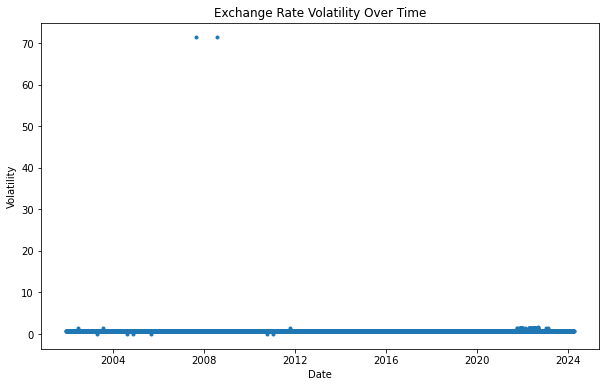

In [27]:
usd_data['Volatility'] = usd_data[['Buying Rate', 'Selling Rate']].std(axis=1)

# Visualize volatility over time
plt.figure(figsize=(10, 6))
plt.scatter(usd_data['Rate Date'], usd_data['Volatility'], marker='.', linestyle='-')
plt.title('Exchange Rate Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

In [35]:
data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2024-03-27,US DOLLAR,2024,March,1303.3420,1303.8420,1304.3420
1,2024-03-27,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231
2,2024-03-27,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231
3,2024-03-27,EURO,2024,March,1410.3464,1410.8874,1411.4285
4,2024-03-27,SWISS FRANC,2024,March,1438.8850,1439.4370,1439.9890


In [44]:
v = usd_data['Volatility']

# Convert Series to DataFrame
volatility_df = pd.DataFrame({'Volatility': v})
volatility_df

,Volatility
0,0.707107
13,0.707107
25,0.707107
37,0.707107
49,0.707107
...,...
54626,0.707107
54629,0.707107
54638,0.707107
54641,0.707107


In [42]:
date_highest_volatility = usd_data.loc[usd_data['Volatility'].idxmax()]

In [92]:
date_highest_volatility

Currency                   US DOLLAR
Rate Year                       2008
Rate Month                       8.0
Buying Rate                    15.59
Central Rate                   66.09
Selling Rate                  116.59
Normalized Buying Rate      0.011962
Normalized Selling Rate     0.089386
Relative Strength           0.050674
Volatility                 71.417785
Name: 8/1/2008, dtype: object

In [45]:
usd_data.head(50)

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Normalized Buying Rate,Normalized Selling Rate,Relative Strength,Volatility
0,2024-03-27,US DOLLAR,2024,3.0,1303.3420,1303.8420,1304.3420,1.000000,1.000000,1.000000,0.707107
13,2024-03-26,US DOLLAR,2024,3.0,1364.3790,1364.8790,1365.3790,1.046831,1.046795,1.046813,0.707107
25,2024-03-25,US DOLLAR,2024,3.0,1415.1340,1415.6340,1416.1340,1.085773,1.085708,1.085740,0.707107
37,2024-03-22,US DOLLAR,2024,3.0,1404.9660,1405.4660,1405.9660,1.077972,1.077912,1.077942,0.707107
49,2024-03-21,US DOLLAR,2024,3.0,1447.8860,1448.3860,1448.8860,1.110903,1.110818,1.110860,0.707107
61,2024-03-20,US DOLLAR,2024,3.0,1409.9430,1410.4430,1410.9430,1.081791,1.081728,1.081759,0.707107
73,2024-03-19,US DOLLAR,2024,3.0,1561.1880,1561.6880,1562.1880,1.197834,1.197683,1.197759,0.707107
85,2024-03-18,US DOLLAR,2024,3.0,1476.2470,1476.7470,1477.2470,1.132663,1.132561,1.132612,0.707107
97,2024-03-15,US DOLLAR,2024,3.0,1572.0070,1572.5070,1573.0070,1.206135,1.205977,1.206056,0.707107
109,2024-03-14,US DOLLAR,2024,3.0,1609.7400,1610.2400,1610.7400,1.235086,1.234906,1.234996,0.707107


In [38]:
data.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2024-03-27,US DOLLAR,2024,March,1303.3420,1303.8420,1304.3420
1,2024-03-27,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231
2,2024-03-27,POUNDS STERLING,2024,March,1645.8603,1646.4917,1647.1231
3,2024-03-27,EURO,2024,March,1410.3464,1410.8874,1411.4285
4,2024-03-27,SWISS FRANC,2024,March,1438.8850,1439.4370,1439.9890
